<a href="https://colab.research.google.com/github/sarvan0506/AI/blob/master/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [3]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-09-04 19:31:59.275249


In [4]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-09-04 19:32:07.973841


### Load pre-shuffled MNIST data into train and test sets

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 1s 0us/step
2019-09-04 20:03:17.515320


(60000, 28, 28)
2019-09-04 20:03:17.557051


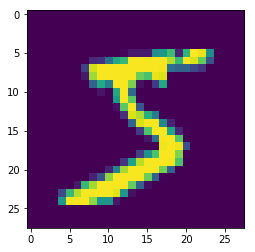

In [9]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-09-04 20:03:18.334463


In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-09-04 20:03:20.868099


In [12]:
y_train[:10]
print(datetime.datetime.now())

2019-09-04 20:03:22.417059


In [13]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-09-04 20:03:23.826395


In [14]:
Y_train[:10]
print(datetime.datetime.now())

2019-09-04 20:03:25.055885


In [15]:
## MAIN BLOCK

from keras.layers import Activation, Conv2D, MaxPooling2D, Input, concatenate
from keras.models import Model
model = Sequential()

#1
x1 =  Input(shape=(28, 28, 1))

#2
x2 = Convolution2D(16, 3, 3, activation='relu')(x1)

x12 = concatenate([x1, x2], axis=1)

#3
x3 = Convolution2D(16, 3, 3, activation='relu')(x12)

x123 = concatenate([x1, x2, x3], axis=1)

#4
x4 = MaxPooling2D(pool_size=(2,2))(x123)

#5
x5 = Convolution2D(16, 3, 3, activation='relu')(x4)

x45 = concatenate([x4, x5], axis=1)

#6
x6 = Convolution2D(16, 3, 3, activation='relu')(x45)

x456 = concatenate([x4, x5, x6], axis=1)

#7
x7 = Convolution2D(16, 3, 3, activation='relu')(x6)

x567 = concatenate([x5, x6, x7], axis=1)

#8
x8 = MaxPooling2D(pool_size=(2,2))(x567)


#9
x9 = Convolution2D(16, 3, 3, activation='relu')(x8)


x89 = concatenate([x8, x9], axis=1)

#10
x10 = Convolution2D(16, 3, 3, activation='relu')(x89)


x8910 = concatenate([x8, x9, x10], axis=1)


x11 = Convolution2D(16, 3, 3, activation='relu')(x8910)


x12 = Convolution2D(10, 1, activation='relu')(x11)


x13 = Convolution2D(10, 1)(x12)

x14 = Convolution2D(10, 10)(x13)

x15 = Flatten()(x14)

xout = Activation('softmax')(x15)

model = Model(x1, xout)

print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


ValueError: ignored

In [0]:
model.summary()

print(datetime.datetime.now())

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

In [0]:
print(score)
print(datetime.datetime.now())